In [4]:
import pandas as pd
import numpy as np
import jupyterlab_dash
import dash
import dash_html_components as html
import dash_core_components as dcc

In [49]:
import plotly.express as px
import plotly.graph_objects as go

In [56]:
import re

In [42]:
real_data = pd.read_csv('Results/Real_Data.csv')
RGD = pd.read_csv('Results/RGD.csv')
RGU = pd.read_csv('Results/RGU.csv')
SF = pd.read_csv('Results/SF.csv')

In [70]:
phis = ['5', '10', '18', '20', '25', '50']
rephis = ['_{}'.format(x) for x in phis]

In [140]:
def get_graph(df, cols, y_lab):
    x = df.iloc[:,0]
    fig = go.Figure()

    for col in cols:
        lab = col.split('_')[1]
        fig.add_trace(go.Scatter(x=x, y=df[col], name=lab))
        
    fig.update_layout(xaxis_title='Average Degree',
                     yaxis_title=y_lab)
    return fig

def get_cols(df, phi, version='S'):
    return [x for x in df.columns if x.endswith(version+'_'+phi)]

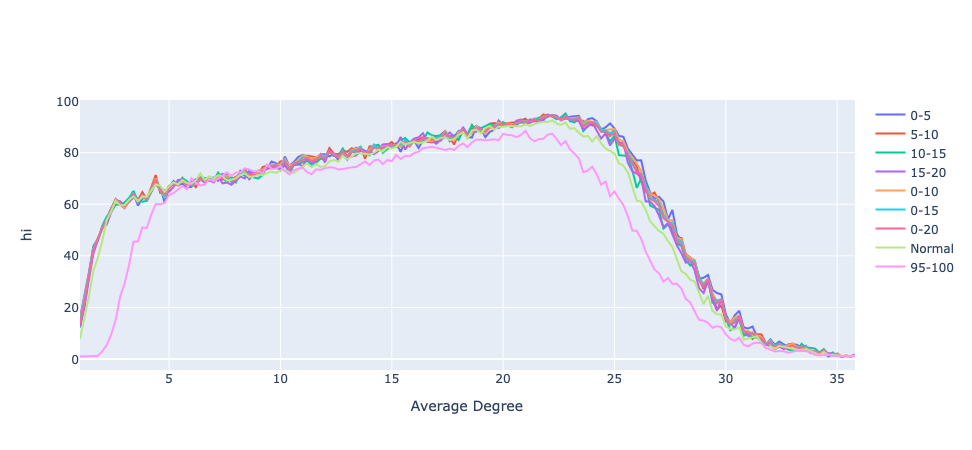

In [143]:
cols = get_cols(df, phi, version='S')
fig=get_graph(df, cols, 'hi')
fig.show()

In [144]:
cols

['RGU_0-5_S_5',
 'RGU_5-10_S_5',
 'RGU_10-15_S_5',
 'RGU_15-20_S_5',
 'RGU_0-10_S_5',
 'RGU_0-15_S_5',
 'RGU_0-20_S_5',
 'RGU_Normal_S_5',
 'RGU_95-100_S_5']

NameError: name 'labs' is not defined

In [153]:
viewer = jupyterlab_dash.AppViewer()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Influentials Dashboard'),
    html.H2('Poisson Random Graph (Undirected)'),
    dcc.Dropdown(
        id='type',
        options=[
            {'label': 'Number of Nodes Influenced', 'value': 'S'},
            {'label': 'Proportion of Network Influenced', 'value': 'N'},
            {'label': 'Average Time of Influenced', 'value': 'T'}
        ],
        value='S'
    ),
    dcc.Graph(
        id='line_graph'
    ),
    dcc.Slider(
        id='line_slider',
        min=0,
        max=len(phis)-1,
        marks={i: '{}%'.format(phis[i]) for i in range(len(phis))},
        value=2,
    )  
])

@app.callback(
    dash.dependencies.Output('line_graph', 'figure'),
    [dash.dependencies.Input('type', 'value'), dash.dependencies.Input('line_slider', 'value')])
def update_graph(version, phi):
    ylabs_map = {'S': 'Number of Nodes Influenced',
            'N': 'Proportion of Network Influenced',
            'T': 'Average Time of Influenced'}
    cols = get_cols(df, phis[phi], version=version)
    fig = get_graph(df, cols, ylabs_map[version])
    return fig

viewer.show(app)

NameError: name 'ylabs_map' is not defined

In [128]:
df.columns

Index(['Average Degree', 'RGU_0-5_S_10', 'RGU_5-10_S_10', 'RGU_10-15_S_10',
       'RGU_15-20_S_10', 'RGU_0-10_S_10', 'RGU_0-15_S_10', 'RGU_0-20_S_10',
       'RGU_Normal_S_10', 'RGU_95-100_S_10',
       ...
       'RGU_95-100_T_5', 'RGU_0-5_N_5', 'RGU_5-10_N_5', 'RGU_10-15_N_5',
       'RGU_15-20_N_5', 'RGU_0-10_N_5', 'RGU_0-15_N_5', 'RGU_0-20_N_5',
       'RGU_Normal_N_5', 'RGU_95-100_N_5'],
      dtype='object', length=163)

In [130]:
phi='5'